<a href="https://colab.research.google.com/github/jedsadakorn19/NLP_code/blob/main/label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
!pip3 install pythainlp
!pip install "tensorflow>=1.9,<2.0"
!pip install --upgrade tensorflow-hub
!pip install bert-for-tf2
!pip install sklearn_crfsuite
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
!pip install fastai==1.0.46
!pip install emoji
!pip install transformers
!pip install "sentencepiece==0.0.9"
!pip3 install tf-sentencepiece
# !pip install tensorflow-hub

Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.6/dist-packages (0.11.0)
  Using cached https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
  Created wheel for pythainlp: filename=pythainlp-2.3.0.dev0-cp36-none-any.whl size=11003386 sha256=72525607d4f84007a635a239e095801a6eace4184a6651593b943827e6e74749
  Stored in directory: /tmp/pip-ephem-wheel-cache-h18tht4m/wheels/79/4e/1e/26f3198c6712ecfbee92928ed1dde923a078da3d222401cc78
Successfully built pythainlp


In [206]:
import pythainlp
pythainlp.__version__

'2.3.0dev0'

In [207]:
# from google.colab import files
# uploaded = files.upload()
!git clone https://github.com/thirasan/bert-1.git

fatal: destination path 'bert-1' already exists and is not an empty directory.


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import codecs
import re,urllib
import numpy as np
from pythainlp.tokenize import word_tokenize,Tokenizer
from nltk.tokenize import RegexpTokenizer
import tensorflow as tf
import tensorflow_hub as hub
from bert import bert_tokenization
from pythainlp.tokenize import word_tokenize
from pythainlp.tokenize import Tokenizer
from pythainlp.util.trie import Trie, dict_trie
from pythainlp.corpus.common import thai_words
from pythainlp.corpus import thai_stopwords
from tqdm import tqdm_notebook
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import Image 
import datetime
from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score, confusion_matrix, f1_score
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import dill as pickle
from transformers import BertTokenizer
import pandas as pd
import torch
from pythainlp import word_vector
from transformers import AutoTokenizer, AutoModel
model_path = 'thwiki_data/models/'

In [2]:
model = AutoModel.from_pretrained("monsoon-nlp/bert-base-thai")
# model = word_vector.get_model()

In [3]:
file_name="1702" # ชื่อไฟล์คลังข้อมูล
def get_data(fileopen):
	"""
    สำหรับใช้อ่านทั้งหมดทั้งในไฟล์ทีละรรทัดออกมาเป็น list
    """
	with codecs.open(fileopen, 'r',encoding='utf-8-sig') as f:
		lines = f.read().splitlines()
	return [a for a in lines if Unique(a)]# เอาไม่ซ้ำกัน

In [4]:
data_not=[]
def Unique(p):
 text=re.sub("<[^>]*>","",p)
 text=re.sub("\[(.*?)\]","",text)
 text=re.sub("\[\/(.*?)\]","",text)   
 if text not in data_not:
  data_not.append(text)
  return True
 else:
  return False

In [5]:
rawdata = get_data("1702.txt")

In [6]:
print(len(rawdata))

92


In [7]:
def toolner_to_tag(text):
 text=text.strip()
 text=re.sub("<[^>]*>","",text)
 text=re.sub("(\[\/(.*?)\])","\\1***",text)#.replace('(\[(.*?)\])','***\\1')#  ตัดการกับพวกไม่มี tag word
 text=re.sub("(\[\w+\])","***\\1",text)
 text2=[]
 for i in text.split('***'):
  if "[" in i:
   text2.append(i)
  # else:
  #  text2.append("[word]"+i+"[/word]")
 text="".join(text2)#re.sub("[word][/word]","","".join(text2))
 return text.replace("[word][/word]","")

In [8]:
def text2conll2002(text,pos=True):
    text=toolner_to_tag(text) # นำไปใส่ tag [word] "[word]เราจะไปเดินเล่นที่[/word]"
    text=text.replace("''",'"')
    text=text.replace("(",'')
    text=text.replace(")",'')
    text=text.replace("[Pronouns]",'')
    text=text.replace("[noun]",'')
    text=text.replace("[intransitive verb]",'')
    text=text.replace("[transitive verb]",'')
    text=text.replace("[Denial word]",'')
    text=text.replace("[word before verb]",'')
    text=text.replace("[word after verb]",'')
    text=text.replace("[Adverbs]",'')
    text=text.replace("[Adverb]",'')
    text=text.replace("[Qualitative noun]",'')
    text=text.replace("[Adjectives]",'')
    text=text.replace("[Numeral word]",'')
    text=text.replace("[Sequence word]",'')
    text=text.replace("[word before numeral]",'')
    text=text.replace("[word after numeral]",'')
    text=text.replace("[Time expression word]",'')
    text=text.replace("[Conclusion word]",'')
    text=text.replace("[Special word]",'')
    text=text.replace("[Prepositions]",'')
    text=text.replace("[Conjunctions]",'')
    text=text.replace("[SS Conjunctions]",'')
    text=text.replace("[Interjections]",'')
    text=text.replace("[abbreviation]",'')
    text=text.replace("[word before noun]",'')
    text=text.replace("[Phrasal Verbs]",'')
    text=text.replace("[Noun phrase]",'')
    text=text.replace("[Noun Conjunctions]",'')
    text=text.replace("[Negator]",'')
    text=text.replace("’",'"').replace("‘",'"')#.replace('"',"")
    tag=tokenizer1.tokenize(text) # แยก tag ออกมาจากข้อความ [('word', 'ฉันจะไปเดินเล่นที่', 'word'),('LOCATION', 'หนองคาย', 'LOCATION'),('word', 'พร้อมกับนั่งเรือข้ามไป', 'word'),('LOCATION', 'ประเทศลาว', 'LOCATION')]
    return tag

In [9]:
pattern = '(.*?)\[\/(.*?)\]'
tokenizer1 = RegexpTokenizer(pattern) # ใช้ nltk.tokenize.RegexpTokenizer เพื่อตัด [TIME]8.00[/TIME] ให้เป็น ('TIME','ไง','TIME')

In [10]:
text2conll2002(rawdata[0])

[('วัน', 'Time expression word'),
 ('นี้ 1', 'Time expression word'),
 (' ส.ค.', 'Time expression word'),
 (' 2563 ', 'Time expression word'),
 ('ผู้สื่อข่าว', 'noun'),
 (' รายงาน', 'intransitive verb'),
 (' ว่า', 'SS Conjunctions'),
 ('ตำรวจ', 'noun'),
 ('เชียงใหม่', 'noun'),
 (' แกะ', 'transitive verb'),
 ('รอย', 'noun'),
 (' พบ', 'transitive verb'),
 ('หลักฐาน', 'noun'),
 ('ใหม่', 'Adjectives'),
 (' จาก', 'Noun Conjunctions'),
 ('ภาพ', 'noun'),
 ('ใน', 'Prepositions'),
 ('กล้องวงจรปิด', 'noun'),
 (' และ', 'Noun Conjunctions'),
 ('พยานบุคคล', 'noun'),
 (' จาก', 'Noun Conjunctions'),
 ('ร้านเหล้า', 'noun'),
 (' แห่ง', 'Qualitative noun'),
 (' หนึ่ง', 'Numeral word'),
 (' พบ', 'intransitive verb'),
 (' ว่า', 'SS Conjunctions'),
 (' นาย', 'word before noun'),
 ('จารุชาติ มาดทอง', 'noun'),
 ('อายุ', 'noun'),
 (' 40', 'Numeral word'),
 ('ปี', 'noun'),
 ('พยานปากเอก', 'noun'),
 ('คดี', 'noun'),
 ('บอส อยู่วิทยา', 'noun'),
 (' และ', 'Noun Conjunctions'),
 (' นาย', 'word before noun'),
 ('สม

In [11]:
print((rawdata[65]))

จาก[/Prepositions] [noun]สวนสัตว์[/noun] [word before verb]ได้[/word before verb] [Adverbs]


In [12]:
d=[]
o=[]
for i in range(len(rawdata[0:75])):
    r=text2conll2002(rawdata[i])
    d.append(r)
for i in range(76,90):
    m=text2conll2002(rawdata[i])
    o.append(m)    

In [13]:
o

[[('ประเด็นหลัก', 'Noun phrase'),
  (' คือ', 'transitive verb'),
  ('สาเหตุ', 'noun'),
  (' ของ', 'Noun Conjunctions'),
  (' การยิงกัน', 'Noun phrase')],
 [('มี', 'transitive verb'),
  ('ความโกรธเคือง', 'noun'),
  (' กัน', 'Conclusion word'),
  ('หรือไม่', 'Adverbs'),
  ('ประเด็น', 'noun'),
  ('การหายไป', 'noun')],
 [('ของ', 'Noun Conjunctions'),
  (' เก้งเผือกพระราชทาน', 'Noun phrase'),
  (' ทั้ง', 'word before numeral'),
  (' 2', 'Numeral word'),
  (' ตัว', 'Qualitative noun')],
 [('[Specially]ด้าน', 'Specially'),
  (' พล.อ.', 'word before noun'),
  ('ประยุทธ์ จันทร์โอชา', 'noun'),
  (' นายกรัฐมนตรี', 'word before noun'),
  (' เชื่อ', 'transitive verb'),
  (' ว่า', 'SS Conjunctions'),
  (' ขบวนการลักลอบค้าสัตว์ป่า', 'Noun phrase'),
  ('ใน', 'Prepositions'),
  ('ประเทศไทย', 'noun'),
  (' มี', 'transitive verb'),
  (' อยู่', 'word after verb'),
  (' จริง', 'word after verb')],
 [('จึง', 'SS Conjunctions'),
  (' สั่งการ', 'transitive verb'),
  (' ให้', 'word after verb'),
  ('กระทรวงทรั

In [14]:
d

[[('วัน', 'Time expression word'),
  ('นี้ 1', 'Time expression word'),
  (' ส.ค.', 'Time expression word'),
  (' 2563 ', 'Time expression word'),
  ('ผู้สื่อข่าว', 'noun'),
  (' รายงาน', 'intransitive verb'),
  (' ว่า', 'SS Conjunctions'),
  ('ตำรวจ', 'noun'),
  ('เชียงใหม่', 'noun'),
  (' แกะ', 'transitive verb'),
  ('รอย', 'noun'),
  (' พบ', 'transitive verb'),
  ('หลักฐาน', 'noun'),
  ('ใหม่', 'Adjectives'),
  (' จาก', 'Noun Conjunctions'),
  ('ภาพ', 'noun'),
  ('ใน', 'Prepositions'),
  ('กล้องวงจรปิด', 'noun'),
  (' และ', 'Noun Conjunctions'),
  ('พยานบุคคล', 'noun'),
  (' จาก', 'Noun Conjunctions'),
  ('ร้านเหล้า', 'noun'),
  (' แห่ง', 'Qualitative noun'),
  (' หนึ่ง', 'Numeral word'),
  (' พบ', 'intransitive verb'),
  (' ว่า', 'SS Conjunctions'),
  (' นาย', 'word before noun'),
  ('จารุชาติ มาดทอง', 'noun'),
  ('อายุ', 'noun'),
  (' 40', 'Numeral word'),
  ('ปี', 'noun'),
  ('พยานปากเอก', 'noun'),
  ('คดี', 'noun'),
  ('บอส อยู่วิทยา', 'noun'),
  (' และ', 'Noun Conjunctions'),
 

In [15]:
train_sentences = d
test_sentences  = o

In [16]:
print(len(train_sentences))
print("Tagged words in train set:", len([item for sublist in train_sentences for item in sublist]))
print(len(test_sentences))
print("Tagged words in test set:", len([item for sublist in test_sentences for item in sublist]))

75
Tagged words in train set: 9603
14
Tagged words in test set: 8454


In [17]:
def tag_sequence(sentences):
    return [[t for w, t in sentence] for sentence in sentences]

def text_sequence(sentences):
    return [[w for w, t in sentence] for sentence in sentences]

In [18]:
tags1 = set([item for sublist in test_sentences for _, item in sublist])
tags2 = set([item for sublist in train_sentences for _, item in sublist])
print('TOTAL TAGS: ', len(tags1))
print('TOTAL TAGS: ', len(tags2))

TOTAL TAGS:  24
TOTAL TAGS:  24


In [19]:
tags = set([item for sublist in train_sentences+test_sentences for _, item in sublist])
print('TOTAL TAGS: ', len(tags))

TOTAL TAGS:  24


In [20]:
print(tags1)
print(tags2)

{'word before verb', 'abbreviation', 'Numeral word', 'Adverbs', 'word before noun', 'SS Conjunctions', 'Noun Conjunctions', 'Specially', 'Noun phrase', 'Qualitative noun', 'Sequence word', 'word after verb', 'noun', 'Conclusion word', 'Adjectives', 'word after numeral', 'word before numeral', 'transitive verb', 'Phrasal Verbs', 'Pronouns', 'Negator', 'intransitive verb', 'Time expression word', 'Prepositions'}
{'word before verb', 'abbreviation', 'Numeral word', 'Adverbs', 'word before noun', 'SS Conjunctions', 'Noun Conjunctions', 'Specially', 'Noun phrase', 'Qualitative noun', 'Sequence word', 'word after verb', 'noun', 'Conclusion word', 'Adjectives', 'word after numeral', 'word before numeral', 'transitive verb', 'Phrasal Verbs', 'Pronouns', 'Negator', 'intransitive verb', 'Time expression word', 'Prepositions'}


In [21]:
print(tags)

{'word before verb', 'abbreviation', 'Numeral word', 'Adverbs', 'word before noun', 'SS Conjunctions', 'Noun Conjunctions', 'Specially', 'Noun phrase', 'Qualitative noun', 'Sequence word', 'word after verb', 'noun', 'Conclusion word', 'Adjectives', 'word after numeral', 'word before numeral', 'transitive verb', 'Phrasal Verbs', 'Pronouns', 'Negator', 'intransitive verb', 'Time expression word', 'Prepositions'}


In [22]:
tag2int = {}
int2tag = {}

for i, tag in enumerate(sorted(tags)):
    tag2int[tag] = i+1
    int2tag[i+1] = tag

In [23]:
tag2int['-PAD-'] = 0
int2tag[0] = '-PAD-'

In [24]:
n_tags = len(tag2int)
print('Total tags:', n_tags)

Total tags: 25


In [25]:
print(tag2int)

{'Adjectives': 1, 'Adverbs': 2, 'Conclusion word': 3, 'Negator': 4, 'Noun Conjunctions': 5, 'Noun phrase': 6, 'Numeral word': 7, 'Phrasal Verbs': 8, 'Prepositions': 9, 'Pronouns': 10, 'Qualitative noun': 11, 'SS Conjunctions': 12, 'Sequence word': 13, 'Specially': 14, 'Time expression word': 15, 'abbreviation': 16, 'intransitive verb': 17, 'noun': 18, 'transitive verb': 19, 'word after numeral': 20, 'word after verb': 21, 'word before noun': 22, 'word before numeral': 23, 'word before verb': 24, '-PAD-': 0}


In [26]:
MAX_SEQUENCE_LENGTH = 70
EPOCHS = 20

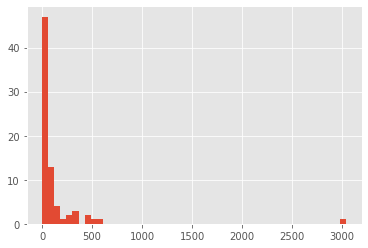

In [27]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.hist([len(s) for s in train_sentences], bins=50)
plt.show()

In [28]:
print('Max sentence length:',len(max(rawdata, key=len)))

Max sentence length: 258669


In [29]:
def  split(sentences, max):
    new=[]
    for data in sentences:
        new.append(([data[x:x+max] for x in range(0, len(data), max)]))
    new = [val for sublist in new for val in sublist]
    return new

In [30]:
train_sentences = split(train_sentences, MAX_SEQUENCE_LENGTH)
test_sentences  = split(test_sentences, MAX_SEQUENCE_LENGTH)

In [31]:
test_sentences

[[('ประเด็นหลัก', 'Noun phrase'),
  (' คือ', 'transitive verb'),
  ('สาเหตุ', 'noun'),
  (' ของ', 'Noun Conjunctions'),
  (' การยิงกัน', 'Noun phrase')],
 [('มี', 'transitive verb'),
  ('ความโกรธเคือง', 'noun'),
  (' กัน', 'Conclusion word'),
  ('หรือไม่', 'Adverbs'),
  ('ประเด็น', 'noun'),
  ('การหายไป', 'noun')],
 [('ของ', 'Noun Conjunctions'),
  (' เก้งเผือกพระราชทาน', 'Noun phrase'),
  (' ทั้ง', 'word before numeral'),
  (' 2', 'Numeral word'),
  (' ตัว', 'Qualitative noun')],
 [('[Specially]ด้าน', 'Specially'),
  (' พล.อ.', 'word before noun'),
  ('ประยุทธ์ จันทร์โอชา', 'noun'),
  (' นายกรัฐมนตรี', 'word before noun'),
  (' เชื่อ', 'transitive verb'),
  (' ว่า', 'SS Conjunctions'),
  (' ขบวนการลักลอบค้าสัตว์ป่า', 'Noun phrase'),
  ('ใน', 'Prepositions'),
  ('ประเทศไทย', 'noun'),
  (' มี', 'transitive verb'),
  (' อยู่', 'word after verb'),
  (' จริง', 'word after verb')],
 [('จึง', 'SS Conjunctions'),
  (' สั่งการ', 'transitive verb'),
  (' ให้', 'word after verb'),
  ('กระทรวงทรั

In [32]:
train_sentences

[[('วัน', 'Time expression word'),
  ('นี้ 1', 'Time expression word'),
  (' ส.ค.', 'Time expression word'),
  (' 2563 ', 'Time expression word'),
  ('ผู้สื่อข่าว', 'noun'),
  (' รายงาน', 'intransitive verb'),
  (' ว่า', 'SS Conjunctions'),
  ('ตำรวจ', 'noun'),
  ('เชียงใหม่', 'noun'),
  (' แกะ', 'transitive verb'),
  ('รอย', 'noun'),
  (' พบ', 'transitive verb'),
  ('หลักฐาน', 'noun'),
  ('ใหม่', 'Adjectives'),
  (' จาก', 'Noun Conjunctions'),
  ('ภาพ', 'noun'),
  ('ใน', 'Prepositions'),
  ('กล้องวงจรปิด', 'noun'),
  (' และ', 'Noun Conjunctions'),
  ('พยานบุคคล', 'noun'),
  (' จาก', 'Noun Conjunctions'),
  ('ร้านเหล้า', 'noun'),
  (' แห่ง', 'Qualitative noun'),
  (' หนึ่ง', 'Numeral word'),
  (' พบ', 'intransitive verb'),
  (' ว่า', 'SS Conjunctions'),
  (' นาย', 'word before noun'),
  ('จารุชาติ มาดทอง', 'noun'),
  ('อายุ', 'noun'),
  (' 40', 'Numeral word'),
  ('ปี', 'noun'),
  ('พยานปากเอก', 'noun'),
  ('คดี', 'noun'),
  ('บอส อยู่วิทยา', 'noun'),
  (' และ', 'Noun Conjunctions'),
 

In [33]:
len(max(train_sentences, key=len))

70

In [34]:
# Initialize session
sess = tf.compat.v1.Session()
# Params for bert model and tokenization
bert_path = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

In [35]:
train_text = text_sequence(train_sentences)
train_label = tag_sequence(train_sentences)
test_text = text_sequence(test_sentences)
test_label= tag_sequence(test_sentences)

In [36]:
len(test_label)

131

In [37]:
train_text[0], train_label[0]

(['วัน',
  'นี้ 1',
  ' ส.ค.',
  ' 2563 ',
  'ผู้สื่อข่าว',
  ' รายงาน',
  ' ว่า',
  'ตำรวจ',
  'เชียงใหม่',
  ' แกะ',
  'รอย',
  ' พบ',
  'หลักฐาน',
  'ใหม่',
  ' จาก',
  'ภาพ',
  'ใน',
  'กล้องวงจรปิด',
  ' และ',
  'พยานบุคคล',
  ' จาก',
  'ร้านเหล้า',
  ' แห่ง',
  ' หนึ่ง',
  ' พบ',
  ' ว่า',
  ' นาย',
  'จารุชาติ มาดทอง',
  'อายุ',
  ' 40',
  'ปี',
  'พยานปากเอก',
  'คดี',
  'บอส อยู่วิทยา',
  ' และ',
  ' นาย',
  'สมชาย ตาวิโน',
  'อายุ',
  ' 50',
  ' ปี',
  'คู่กรณี',
  ' ที่',
  ' ขี่',
  'จักรยานยนต์',
  ' ชน',
  'กัน',
  'ได้',
  'พบ',
  'กัน',
  'ที่',
  'ร้านเหล้า',
  ' และ',
  ' ชักชวน',
  'กัน',
  ' ไป',
  ' เที่ยว',
  ' ต่อ',
  ' จึง',
  ' ขี่',
  'รถจักรยานยนต์',
  ' ตาม',
  'กัน',
  ' มา',
  ' ก่อน',
  ' จะ',
  ' ชน',
  'กัน',
  ' เสียชีวิต',
  ' และ',
  ' บาดเจ็บ'],
 ['Time expression word',
  'Time expression word',
  'Time expression word',
  'Time expression word',
  'noun',
  'intransitive verb',
  'SS Conjunctions',
  'noun',
  'noun',
  'transitive verb',
  'noun'

In [38]:
class PaddingInputExample(object):
    """Fake example so the num input examples is a multiple of the batch size.
  When running eval/predict on the TPU, we need to pad the number of examples
  to be a multiple of the batch size, because the TPU requires a fixed batch
  size. The alternative is to drop the last batch, which is bad because it means
  the entire output data won't be generated.
  We use this class instead of `None` because treating `None` as padding
  battches could cause silent errors.
  """

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
    Args:
      guid: Unique id for the example.
      text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
      text_b: (Optional) string. The untokenized text of the second sequence.
        Only must be specified for sequence pair tasks.
      label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

def create_tokenizer_from_hub_module():
    """Get the vocab file and casing info from the Hub module."""
    bert_module =  hub.Module(bert_path)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    # bert_module =  hub.load(bert_path)
    # tokenization_info = bert_module.signatures['tokenization_info']
    vocab_file, do_lower_case = sess.run(
        [
            tokenization_info["vocab_file"],
            tokenization_info["do_lower_case"],
        ]
    )

    return  bert_tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)

def convert_single_example(tokenizer, example, max_seq_length=256):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        input_ids = [0] * max_seq_length
        input_mask = [0] * max_seq_length
        segment_ids = [0] * max_seq_length
        label_ids = [0] * max_seq_length
        return input_ids, input_mask, segment_ids, label_ids
    
    tokens_a = example.text_a
    if len(tokens_a) > max_seq_length-2:
        tokens_a = tokens_a[0 : (max_seq_length-2)]

# Token map will be an int -> int mapping between the `orig_tokens` index and
# the `bert_tokens` index.

# bert_tokens == ["[CLS]", "john", "johan", "##son", "'", "s", "house", "[SEP]"]
# orig_to_tok_map == [1, 2, 4, 6]   
    orig_to_tok_map = []              
    tokens = []
    segment_ids = []
    
    tokens.append("[CLS]")
    segment_ids.append(0)
    orig_to_tok_map.append(len(tokens)-1)
    #print(len(tokens_a))
    for token in tokens_a:       
        tokens.extend(tokenizer.tokenize(token))
        #tokens.extend(_tokenizer.word_tokenize(token))
        
        orig_to_tok_map.append(len(tokens)-1)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)
    orig_to_tok_map.append(len(tokens)-1)
    input_ids = tokenizer.convert_tokens_to_ids([tokens[i] for i in orig_to_tok_map])
    #print(len(orig_to_tok_map), len(tokens), len(input_ids), len(segment_ids)) #for debugging

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)
    
    label_ids = []
    labels = example.label
    label_ids.append(0)
    label_ids.extend([tag2int[label] for label in labels])
    label_ids.append(0)
    #print(len(label_ids)) #for debugging
    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)
        label_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length
    assert len(label_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, label_ids

def convert_examples_to_features(tokenizer, examples, max_seq_length=256):
    """Convert a set of `InputExample`s to a list of `InputFeatures`."""

    input_ids, input_masks, segment_ids, labels = [], [], [], []
    for example in tqdm_notebook(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(
            tokenizer, example, max_seq_length
        )
        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)
    return (
        np.array(input_ids),
        np.array(input_masks),
        np.array(segment_ids),
        np.array(labels),
    )

def convert_text_to_examples(texts, labels):
    """Create InputExamples"""
    InputExamples = []
    for text, label in zip(texts, labels):
        InputExamples.append(
            InputExample(guid=None, text_a=text, text_b=None, label=label)
        )
    return InputExamples

In [39]:
# tokenizer = create_tokenizer_from_hub_module()

In [42]:
cd ..

/content


In [43]:
# tokenizer = BertTokenizer.from_pretrained('monsoon-nlp/bert-base-thai')
from bert1.tokenization import *
tokenizer = ThaiTokenizer(vocab_file='m.vocab', spm_file='m.model')  

In [44]:
custom_words_list = set(thai_words())
custom_words_list.add('การที่รองอัยการสูงสุด')
custom_words_list.add('ผบ.ตร.')
custom_words_list.add('คำสั่งฟ้อง')
custom_words_list.add('ก.ค.')
trie = dict_trie(dict_source=custom_words_list)
_tokenizer = Tokenizer(custom_dict=trie, engine='newmm')

In [45]:
def bert_labels(labels):
    train_label_bert = []
    train_label_bert.append('-PAD-')
    for i in labels:
        train_label_bert.append(i)
    train_label_bert.append('-PAD-')
    print('BERT labels:', train_label_bert)

In [46]:
tokens_a = train_text[2]
tokens_a

[' บาดเจ็บ',
 ' ไป',
 ' ก่อนหน้านี้',
 ' ขณะนี้',
 'อาการ',
 ' พ้น',
 'ขีดอันตราย',
 ' แต่',
 ' ยังคง',
 ' พัก',
 ' รักษา',
 'ตัว',
 'ที่',
 'โรงพยาบาล',
 'มหาราชนครราชสีมา']

In [47]:

orig_to_tok_map = []              
tokens = []
segment_ids = []
tokens.append("[CLS]")
segment_ids.append(0)
orig_to_tok_map.append(len(tokens)-1)
for token in tokens_a:
    #orig_to_tok_map.append(len(tokens)) # keep first piece of tokenized term
    tokens.extend(tokenizer.tokenize(token))
    #tokens.extend(_tokenizer.word_tokenize(token))
    orig_to_tok_map.append(len(tokens)-1) # # keep last piece of tokenized term -->> gives better results!
    segment_ids.append(0)    
tokens.append("[SEP]")
print(tokens)
segment_ids.append(0)
print(segment_ids)
orig_to_tok_map.append(len(tokens)-1)
print(orig_to_tok_map)
input_ids = tokenizer.convert_tokens_to_ids([tokens[i] for i in orig_to_tok_map])
print(input_ids)
print(len(input_ids))

['[CLS]', '▁', 'บาดเจ็บ', '▁ไป', '▁ก่อนหน้านี้', '▁ขณะนี้', 'อาการ', '▁', 'พ้น', '▁ขี', 'ด', 'อันตราย', '▁แต่', '▁ยังคง', '▁', 'พัก', '▁รักษา', '▁ตัว', '▁ที่', '▁โรงพยาบาล', '▁มหา', 'ราช', 'น', 'ครราช', 'สีม', 'า', '[SEP]']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 3, 4, 5, 6, 8, 11, 12, 13, 15, 16, 17, 18, 19, 25, 26]
[1, 1234, 1184, 13810, 270, 6918, 5010, 3294, 48, 2150, 1177, 8594, 1081, 68, 8906, 13, 2]
17


In [48]:
print('Original tokens:',tokens_a)
print(len(tokens_a))

Original tokens: [' บาดเจ็บ', ' ไป', ' ก่อนหน้านี้', ' ขณะนี้', 'อาการ', ' พ้น', 'ขีดอันตราย', ' แต่', ' ยังคง', ' พัก', ' รักษา', 'ตัว', 'ที่', 'โรงพยาบาล', 'มหาราชนครราชสีมา']
15


In [49]:
print('Original tokens:',tokens_a[2])
print('Original tokens:',train_text[2][2])

Original tokens:  ก่อนหน้านี้
Original tokens:  ก่อนหน้านี้


In [50]:
print(train_text[2])
print(len(train_text[2]))

[' บาดเจ็บ', ' ไป', ' ก่อนหน้านี้', ' ขณะนี้', 'อาการ', ' พ้น', 'ขีดอันตราย', ' แต่', ' ยังคง', ' พัก', ' รักษา', 'ตัว', 'ที่', 'โรงพยาบาล', 'มหาราชนครราชสีมา']
15


In [51]:
print("Labal:",train_label[2])
print(len(train_label[2]))

Labal: ['intransitive verb', 'word after verb', 'Time expression word', 'Time expression word', 'noun', 'intransitive verb', 'noun', 'SS Conjunctions', 'word before verb', 'intransitive verb', 'intransitive verb', 'noun', 'Prepositions', 'noun', 'noun']
15


In [52]:
print('BERT tokens:',tokens)
print(len(tokens))

BERT tokens: ['[CLS]', '▁', 'บาดเจ็บ', '▁ไป', '▁ก่อนหน้านี้', '▁ขณะนี้', 'อาการ', '▁', 'พ้น', '▁ขี', 'ด', 'อันตราย', '▁แต่', '▁ยังคง', '▁', 'พัก', '▁รักษา', '▁ตัว', '▁ที่', '▁โรงพยาบาล', '▁มหา', 'ราช', 'น', 'ครราช', 'สีม', 'า', '[SEP]']
27


In [53]:
bert_labels(train_label[2])
print(len(train_label[2]))

BERT labels: ['-PAD-', 'intransitive verb', 'word after verb', 'Time expression word', 'Time expression word', 'noun', 'intransitive verb', 'noun', 'SS Conjunctions', 'word before verb', 'intransitive verb', 'intransitive verb', 'noun', 'Prepositions', 'noun', 'noun', '-PAD-']
15


In [54]:
print(len(tokens))
print(len(train_label[2]))

27
15


In [55]:
orig_to_tok_map

[0, 2, 3, 4, 5, 6, 8, 11, 12, 13, 15, 16, 17, 18, 19, 25, 26]

In [56]:
print(input_ids)
print(len(input_ids))

[1, 1234, 1184, 13810, 270, 6918, 5010, 3294, 48, 2150, 1177, 8594, 1081, 68, 8906, 13, 2]
17


In [57]:
"""Create InputExamples"""
InputExamples = []
for text, label in zip(train_text[0:1], train_label[0:1]):
    InputExamples.append(
        InputExample(guid=None, text_a=text, text_b=None, label=label)
)

In [58]:
input_ids, input_masks, segment_ids, labels = [], [], [], []
for example in tqdm_notebook(InputExamples, desc="Converting examples to features"):
    input_id, input_mask, segment_id, label = convert_single_example(
        tokenizer, example, MAX_SEQUENCE_LENGTH+2
    )
    input_ids.append(input_id)
    input_masks.append(input_mask)
    segment_ids.append(segment_id)
    labels.append(label)
    print(input_id)
    print(input_ids)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


[1, 230, 15, 7, 188, 317, 12395, 287, 53, 200, 5506, 10278, 179, 480, 324, 198, 5121, 151, 4506, 9, 8795, 198, 1463, 642, 457, 179, 287, 62, 150, 30, 300, 18, 1021, 349, 397, 9, 62, 32, 30, 426, 18, 937, 68, 441, 1394, 1041, 4416, 70, 179, 4416, 68, 1463, 9, 1689, 4416, 1184, 13496, 141, 95, 441, 1032, 613, 4416, 325, 268, 374, 1041, 4416, 899, 9, 1234, 2]
[[1, 230, 15, 7, 188, 317, 12395, 287, 53, 200, 5506, 10278, 179, 480, 324, 198, 5121, 151, 4506, 9, 8795, 198, 1463, 642, 457, 179, 287, 62, 150, 30, 300, 18, 1021, 349, 397, 9, 62, 32, 30, 426, 18, 937, 68, 441, 1394, 1041, 4416, 70, 179, 4416, 68, 1463, 9, 1689, 4416, 1184, 13496, 141, 95, 441, 1032, 613, 4416, 325, 268, 374, 1041, 4416, 899, 9, 1234, 2]]



In [59]:
print(input_id)
print(len(input_id))

[1, 230, 15, 7, 188, 317, 12395, 287, 53, 200, 5506, 10278, 179, 480, 324, 198, 5121, 151, 4506, 9, 8795, 198, 1463, 642, 457, 179, 287, 62, 150, 30, 300, 18, 1021, 349, 397, 9, 62, 32, 30, 426, 18, 937, 68, 441, 1394, 1041, 4416, 70, 179, 4416, 68, 1463, 9, 1689, 4416, 1184, 13496, 141, 95, 441, 1032, 613, 4416, 325, 268, 374, 1041, 4416, 899, 9, 1234, 2]
72


In [60]:
print(input_ids)
print(len(input_ids))

[[1, 230, 15, 7, 188, 317, 12395, 287, 53, 200, 5506, 10278, 179, 480, 324, 198, 5121, 151, 4506, 9, 8795, 198, 1463, 642, 457, 179, 287, 62, 150, 30, 300, 18, 1021, 349, 397, 9, 62, 32, 30, 426, 18, 937, 68, 441, 1394, 1041, 4416, 70, 179, 4416, 68, 1463, 9, 1689, 4416, 1184, 13496, 141, 95, 441, 1032, 613, 4416, 325, 268, 374, 1041, 4416, 899, 9, 1234, 2]]
1


In [61]:
test_text

[['ประเด็นหลัก', ' คือ', 'สาเหตุ', ' ของ', ' การยิงกัน'],
 ['มี', 'ความโกรธเคือง', ' กัน', 'หรือไม่', 'ประเด็น', 'การหายไป'],
 ['ของ', ' เก้งเผือกพระราชทาน', ' ทั้ง', ' 2', ' ตัว'],
 ['[Specially]ด้าน',
  ' พล.อ.',
  'ประยุทธ์ จันทร์โอชา',
  ' นายกรัฐมนตรี',
  ' เชื่อ',
  ' ว่า',
  ' ขบวนการลักลอบค้าสัตว์ป่า',
  'ใน',
  'ประเทศไทย',
  ' มี',
  ' อยู่',
  ' จริง'],
 ['จึง', ' สั่งการ', ' ให้', 'กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม'],
 ['เร่ง',
  '  ติดตาม',
  ' ขบวนการลักลอบสัตว์ป่า',
  ' หรือ',
  ' ลูกเก้งเผือก',
  ' ที่',
  '  หาย',
  ' ไป',
  ' เป็น',
  'การด่วน',
  ' หรือ',
  ' หาก'],
 ['ตาย',
  ' แล้ว',
  ' ก็จะต้อง',
  ' หา',
  'คำตอบ',
  ' ให้ได้ ',
  ' พร้อม',
  ' แสดง',
  'ความเสียใจ',
  ' กับ',
  ' 2 ',
  'ครอบครัว',
  ' ที่',
  ' ต้อง',
  '  สูญเสีย',
  'บุคลากร',
  'สำคัญ',
  'ภายใน',
  'ครอบครัว',
  ' ไปอย่าง',
  'กะทันหัน',
  ' โดย',
  ' มอบหมาย',
  ' ให้',
  'ต้นสังกัด',
  'เร่ง',
  '  สอบสวน',
  ' หา',
  'ข้อเท็จจริง',
  ' เพื่อ',
  ' หา',
  ' คนรับผิดชอบ',
  ' อีกทั้ง'

In [62]:
test_label

[['Noun phrase',
  'transitive verb',
  'noun',
  'Noun Conjunctions',
  'Noun phrase'],
 ['transitive verb', 'noun', 'Conclusion word', 'Adverbs', 'noun', 'noun'],
 ['Noun Conjunctions',
  'Noun phrase',
  'word before numeral',
  'Numeral word',
  'Qualitative noun'],
 ['Specially',
  'word before noun',
  'noun',
  'word before noun',
  'transitive verb',
  'SS Conjunctions',
  'Noun phrase',
  'Prepositions',
  'noun',
  'transitive verb',
  'word after verb',
  'word after verb'],
 ['SS Conjunctions', 'transitive verb', 'word after verb', 'noun'],
 ['word before verb',
  'intransitive verb',
  'Noun phrase',
  'Noun Conjunctions',
  'Noun phrase',
  'SS Conjunctions',
  'intransitive verb',
  'word after verb',
  'transitive verb',
  'noun',
  'Noun Conjunctions',
  'word after verb'],
 ['intransitive verb',
  'word after verb',
  'word before verb',
  'transitive verb',
  'noun',
  'word after verb',
  'Noun Conjunctions',
  'transitive verb',
  'noun',
  'Noun Conjunctions',
  '

In [63]:
train_examples = convert_text_to_examples(train_text, train_label)
test_examples = convert_text_to_examples(test_text, test_label)

In [64]:
train_label[2]

['intransitive verb',
 'word after verb',
 'Time expression word',
 'Time expression word',
 'noun',
 'intransitive verb',
 'noun',
 'SS Conjunctions',
 'word before verb',
 'intransitive verb',
 'intransitive verb',
 'noun',
 'Prepositions',
 'noun',
 'noun']

In [65]:
# Convert to features
(train_input_ids, train_input_masks, train_segment_ids, train_labels_ids
) = convert_examples_to_features(tokenizer, train_examples, max_seq_length=MAX_SEQUENCE_LENGTH+2)
(test_input_ids, test_input_masks, test_segment_ids, test_labels_ids
) = convert_examples_to_features(tokenizer, test_examples, max_seq_length=MAX_SEQUENCE_LENGTH+2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [66]:
print(len(train_input_ids[0]))
print(len(train_input_masks[0]))
print(len(train_segment_ids[0]))
print(len(train_labels_ids[0]))

72
72
72
72


In [67]:
train_input_ids[1]

array([    1,    68,   273,     7,  1524,   151,   200,   205,  1163,
           7,   276,   211,     7,   311,   230,   111,    15,     7,
         188,   317, 12395,   287,  5176,     7,    13,   248,    19,
           9,  4800,   198,   220,   303,  8540,     9,   391,    62,
        1306,   207,  1463,    41,    68,   411,    53,  8133,   377,
         495,   134,   457,   151,     7, 10196,     7,  2052,     7,
          13,    52,  9567,   311,    85,     7, 12165,  5176,     7,
          13,    33, 13483,  1494,   830,  2142,     9,  1496,     2])

In [68]:
train_input_masks[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [69]:
train_segment_ids[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [70]:
train_labels_ids[0]

array([ 0, 15, 15, 15, 15, 18, 17, 12, 18, 18, 19, 18, 19, 18,  1,  5, 18,
        9, 18,  5, 18,  5, 18, 11,  7, 17, 12, 22, 18, 18,  7, 18, 18, 18,
       18,  5, 22, 18, 18,  7, 11, 18, 12, 19, 18, 19, 21, 24, 19, 10,  9,
       18, 12, 19, 10, 17, 17, 21, 12, 19, 18, 19, 10, 21, 12, 24, 19, 10,
       17, 12, 17,  0])

In [71]:
# One-hot encode labels
train_labels = keras.utils.to_categorical(train_labels_ids, num_classes=n_tags)
test_labels = keras.utils.to_categorical(test_labels_ids, num_classes=n_tags)

In [72]:
train_input_ids[0], train_labels[0]

(array([    1,   230,    15,     7,   188,   317, 12395,   287,    53,
          200,  5506, 10278,   179,   480,   324,   198,  5121,   151,
         4506,     9,  8795,   198,  1463,   642,   457,   179,   287,
           62,   150,    30,   300,    18,  1021,   349,   397,     9,
           62,    32,    30,   426,    18,   937,    68,   441,  1394,
         1041,  4416,    70,   179,  4416,    68,  1463,     9,  1689,
         4416,  1184, 13496,   141,    95,   441,  1032,   613,  4416,
          325,   268,   374,  1041,  4416,   899,     9,  1234,     2]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [73]:
# bert_path = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"
bert_path = "https://tfhub.dev/google/bert_multi_cased_L-12_H-768_A-12/1"

In [74]:
class BertLayer(keras.layers.Layer):
    def __init__(self, output_representation='sequence_output', trainable=True, **kwargs):
        self.bert = None
        super(BertLayer, self).__init__(**kwargs)
        
        self.trainable = trainable
        self.output_representation = output_representation

    def build(self, input_shape):
        # SetUp tensorflow Hub module
        self.bert = hub.Module(bert_path,
                               trainable=self.trainable, 
                               name="{}_module".format(self.name))

        # Assign module's trainable weights to model
        # Remove unused layers and set trainable parameters
        # s = ["/cls/", "/pooler/", 'layer_11', 'layer_10', 'layer_9', 'layer_8', 'layer_7', 'layer_6']
        s = ["/cls/", "/pooler/"]
        self._trainable_weights += [var for var in self.bert.variables[:] if not any(x in var.name for x in s)]
            
        for var in self.bert.variables:
            if var not in self._trainable_weights:
                self._non_trainable_weights.append(var)
                
        # See Trainable Variables
        #tf.logging.info("**** Trainable Variables ****")
        #for var in self.trainable_weights:
        #    init_string = ", *INIT_FROM_CKPT*"
        #    tf.logging.info("  name = %s, shape = %s%s", var.name, var.shape, init_string)
            
        print('Trainable weights:',len(self._trainable_weights))
        super(BertLayer, self).build(input_shape)

    def call(self, inputs, mask=None):
        inputs = [keras.backend.cast(x, dtype="int32") for x in inputs]
        input_ids, input_mask, segment_ids = inputs
        bert_inputs = dict(
            input_ids=input_ids, input_mask=input_mask, segment_ids=segment_ids
        )
        result = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
            self.output_representation
        ]
        return result

    def compute_mask(self, inputs, mask=None):
        return keras.backend.not_equal(inputs[0], 0.0)   

    def compute_output_shape(self, input_shape):
        if self.output_representation == 'pooled_output':
            return (None, 768)
        else:
            return (None, None, 768)

In [75]:
# Build model
def build_model(max_seq_length):
    seed = 0 
    in_id = keras.layers.Input(shape=(max_seq_length,), name="input_ids")
    in_mask = keras.layers.Input(shape=(max_seq_length,), name="input_masks")
    in_segment = keras.layers.Input(shape=(max_seq_length,), name="segment_ids")
    bert_inputs = [in_id, in_mask, in_segment]
    
    np.random.seed(seed)
    bert_output = BertLayer()(bert_inputs)

    np.random.seed(seed)
    outputs = keras.layers.Dense(n_tags, activation=keras.activations.softmax)(bert_output)

    np.random.seed(seed)
    model = keras.models.Model(inputs=bert_inputs, outputs=outputs)
    np.random.seed(seed)
    model.compile(optimizer=keras.optimizers.Adam(lr=0.00004), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])   
    model.summary(100)
    return model

def initialize_vars(sess):
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    keras.backend.set_session(sess)

In [76]:
# import tf_sentencepiece
model = build_model(MAX_SEQUENCE_LENGTH+2) # We sum 2 for [CLS], [SEP] tokens

INFO:absl:Using /tmp/tfhub_modules to cache modules.


Trainable weights: 197
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "model"
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_ids (InputLayer)           [(None, 72)]          0                                            
____________________________________________________________________________________________________
input_masks (InputLayer)         [(None, 72)]          0                                            
____________________________________________________________________________________________________
segment_ids (InputLayer)         [(None, 72)]          0                                            
____________________________________________________________________________________________________
bert_layer (BertLayer)           (None, None, 768)     178565115   input_ids[0][0]                  
                                                                   input_mas

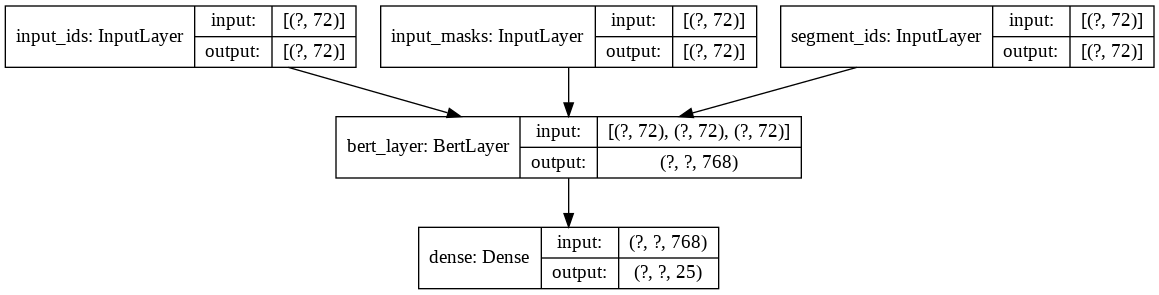

In [77]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)
Image('model.png')


In [78]:
train_input_ids.shape

(181, 72)

In [79]:
train_input_masks.shape

(181, 72)

In [80]:
train_segment_ids.shape

(181, 72)

In [81]:
train_labels.shape

(181, 72, 25)

In [82]:
initialize_vars(sess)

In [83]:
t_ini = datetime.datetime.now()
print(EPOCHS)
EPOCHS=30
cp = keras.callbacks.ModelCheckpoint(filepath="model.ckpt",
                     monitor='val_acc',
                     save_best_only=True,
                     save_weights_only=True,
                     verbose=1)

early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_acc', patience = 5)

history = model.fit([train_input_ids, train_input_masks, train_segment_ids], 
                    train_labels,
                    validation_data=([test_input_ids, test_input_masks, test_segment_ids], test_labels),
                    #validation_split=0.3,
                    epochs=EPOCHS,
                    batch_size=16,
                    shuffle=True,
                    verbose=1,
                    callbacks=[cp, early_stopping]
                   ) 

t_fin = datetime.datetime.now()
print('Training completed in {} seconds'.format((t_fin - t_ini).total_seconds()))

20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 181 samples, validate on 131 samples
Epoch 1/30
176/181 [============================>.] - ETA: 3s - loss: 2.1347 - acc: 0.2424 
Epoch 00001: val_acc improved from -inf to 0.28201, saving model to model.ckpt
181/181 [==============================] - 175s 969ms/sample - loss: 2.1222 - acc: 0.2437 - val_loss: 2.1833 - val_acc: 0.2820
Epoch 2/30
176/181 [============================>.] - ETA: 3s - loss: 1.9000 - acc: 0.2894 
Epoch 00002: val_acc improved from 0.28201 to 0.29612, saving model to model.ckpt
181/181 [==============================] - 170s 937ms/sample - loss: 1.9009 - acc: 0.2911 - val_loss: 2.1105 - val_acc: 0.2961
Epoch 3/30
176/181 [============================>.] - ETA: 3s - loss: 1.7474 - acc: 0.3369 
Epoch 00003: val_acc improved from 0.29612 to 0.39651, saving model to model.ckpt
181/181 [==============================] - 167s 924ms/sample - loss: 1.7431 - acc: 0.3373 - val_loss: 1.9082 - val_acc: 0.3965
Epoch 4/30
176/181 [============================>.] - 

In [84]:
model = build_model(MAX_SEQUENCE_LENGTH+2) 
model.load_weights('model.ckpt')

Trainable weights: 197
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "model_1"
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_ids (InputLayer)           [(None, 72)]          0                                            
____________________________________________________________________________________________________
input_masks (InputLayer)         [(None, 72)]          0                                            
____________________________________________________________________________________________________
segment_ids (InputLayer)         [(None, 72)]          0                                            
____________________________________________________________________________________________________
bert_layer_1 (BertLayer)         (None, None, 768)     178565115   input_ids[0][0]                  
                                                                   input_m

In [85]:
y_pred = model.predict([test_input_ids, test_input_masks, test_segment_ids]).argmax(-1)
y_true = test_labels.argmax(-1)

In [86]:
y_true[0]

array([ 0,  6, 19, 18,  5,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [87]:
def y2label(zipped, mask=0):
    out_true = []
    out_pred = []
    for zip_i in zipped:
        a, b = tuple(zip_i)
        if a != mask :
            out_true.append(int2tag[a])
            out_pred.append(int2tag[b])
    return out_true, out_pred

In [88]:
y_zipped = zip(y_true.flat, y_pred.flat)
y_true, y_pred = y2label(y_zipped)

In [89]:
len(y_true), len(y_pred)

(8454, 8454)

In [90]:
name='Bert fine-tuned model'
print('\n------------ Result of {} ----------\n'.format(name))
print(classification_report(y_true, y_pred, digits=4))


------------ Result of Bert fine-tuned model ----------

                      precision    recall  f1-score   support

               -PAD-     0.0000    0.0000    0.0000         0
          Adjectives     0.2772    0.1308    0.1778       214
             Adverbs     0.1420    0.1212    0.1308       198
     Conclusion word     0.0000    0.0000    0.0000         2
             Negator     0.9649    0.8800    0.9205       125
   Noun Conjunctions     0.2211    0.2150    0.2180       293
         Noun phrase     0.1111    0.0368    0.0552       136
        Numeral word     0.6523    0.5038    0.5685       391
       Phrasal Verbs     0.0143    0.0152    0.0147        66
        Prepositions     0.4356    0.6592    0.5246       267
            Pronouns     0.3023    0.3250    0.3133        40
    Qualitative noun     0.4545    0.3782    0.4128       238
     SS Conjunctions     0.4364    0.4011    0.4180       753
       Sequence word     0.0000    0.0000    0.0000         2
           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
print("Accuracy: {0:.4f}".format(accuracy_score(y_true, y_pred)))
print('f1-macro score: {0:.4f}'.format(f1_score(y_true, y_pred, average='macro')))

Accuracy: 0.5270
f1-macro score: 0.2877


In [92]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [93]:
def plot_confusion_matrix(f1,
                          cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          i=1):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.figure(figsize=(20, 12))
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}; f1-score={:0.4f}'.format(accuracy, misclass, f1))

In [94]:
def plot_acc():
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [95]:
def plot_loss():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

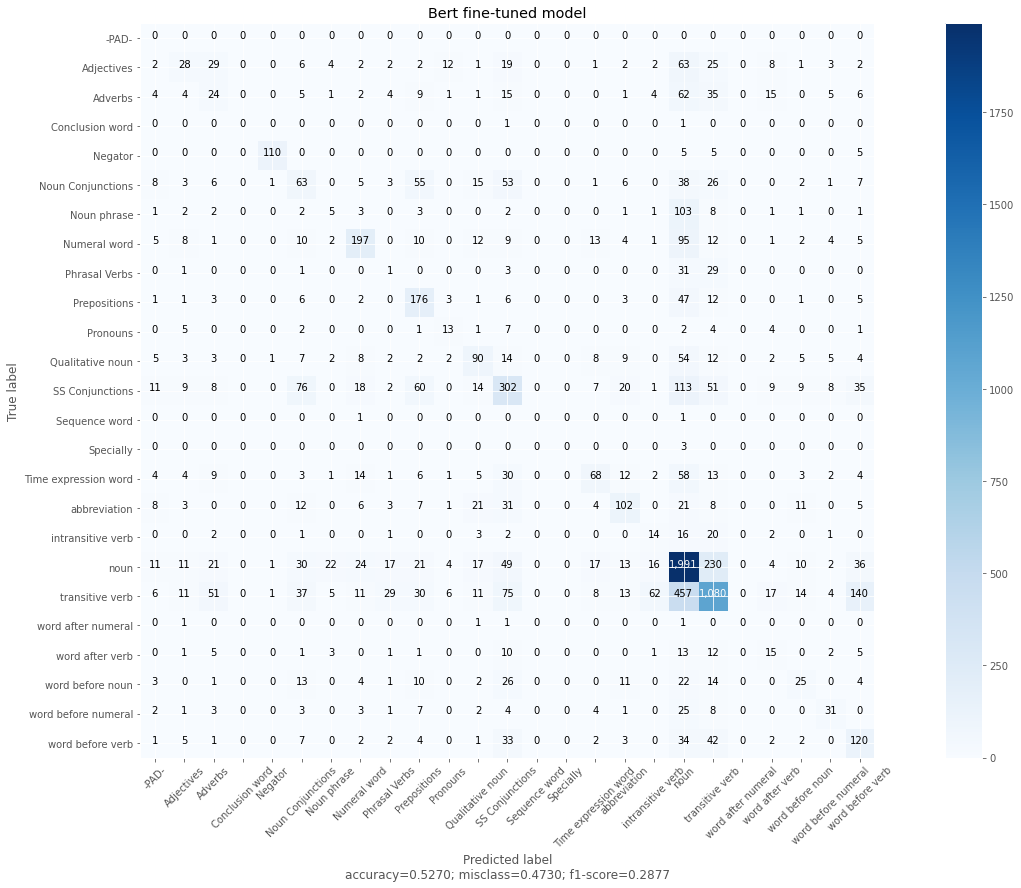

In [96]:
tags = sorted(set(y_pred+y_true))
cnf_matrix = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(f1_score(y_true, y_pred, average='macro'), cnf_matrix, target_names=tags, title=name, normalize=False)

In [97]:
y_pred = model.predict([test_input_ids, test_input_masks, test_segment_ids], batch_size=16).argmax(-1)
y_true = test_labels_ids

def make_prediction(i=16):
    note = ''
    sent = []
    print("{:10} {:5} : {:5}".format("Word", "True", "Predicted"))
    print(35*'-')
    for w, true, pred in zip(test_input_ids[i], y_true[i], y_pred[i]):
        if tokenizer.convert_ids_to_tokens([w])[0]!='[PAD]' and \
            tokenizer.convert_ids_to_tokens([w])[0]!='[CLS]' and \
            tokenizer.convert_ids_to_tokens([w])[0]!='[SEP]':
            if int2tag[true] != int2tag[pred]: note='<<--- Error!'
            print("{:10} {:5} : {:5} {:5}".format(tokenizer.convert_ids_to_tokens([w])[0], int2tag[true], int2tag[pred], note))
            note=''

In [98]:
make_prediction(i=12)

Word       True  : Predicted
-----------------------------------
▁2563      Numeral word : Numeral word      
▁ตํารวจ    noun  : abbreviation <<--- Error!
.          abbreviation : transitive verb <<--- Error!
ธิ         noun  : noun       
▁จังหวัด   noun  : noun       
บุรี       noun  : noun       
▁เข้า      word before verb : Prepositions <<--- Error!
▁ตรวจสอบ   transitive verb : transitive verb      
▁ภายใน     Prepositions : Prepositions      
ฏิ         noun  : noun       
เจ้าอาวาส  noun  : noun       
▁วัด       noun  : noun       
ชา         noun  : noun       
▁หลัง      word before verb : word before verb      
▁มี        transitive verb : Pronouns <<--- Error!
▁ผู้ก่อเหตุ noun  : noun       
งัด        transitive verb : noun  <<--- Error!
ฏิ         noun  : noun       
ขโมย       transitive verb : SS Conjunctions <<--- Error!
เงินสด     noun  : noun       
▁และ       Noun Conjunctions : SS Conjunctions <<--- Error!
สิ่งของ    noun  : noun       
มีค่า      Adverbs : noun 

In [99]:
sentence_raw1 = 'พี่สาวผงะ พบโครงกระดูกติดซากรถถูกไฟคลอกดับ เชื่อเป็นน้องชายที่หายไปนั้น ได้รับรายงานจากการ'

In [100]:
sentence_raw=sentence_raw1.replace(" ", "")

In [101]:
# from pythainlp.tokenize import word_tokenize
sentence_ini = word_tokenize(sentence_raw)

In [102]:
sentence_ini

['พี่สาว',
 'ผงะ',
 'พบ',
 'โครงกระดูก',
 'ติด',
 'ซาก',
 'รถ',
 'ถูก',
 'ไฟ',
 'คลอก',
 'ดับ',
 'เชื่อ',
 'เป็น',
 'น้องชาย',
 'ที่',
 'หาย',
 'ไป',
 'นั้น',
 'ได้รับ',
 'รายงาน',
 'จาก',
 'การ']

In [103]:
tokens_a = sentence_ini

In [104]:
orig_to_tok_map = []              
tokens = []
segment_ids = []
tokens.append("[CLS]")
segment_ids.append(0)
orig_to_tok_map.append(len(tokens)-1)
for token in tokens_a:
    #orig_to_tok_map.append(len(tokens)) # keep first piece of tokenized term
    tokens.extend(tokenizer.tokenize(token))
    # tokens.extend(_tokenizer.word_tokenize(token))
    orig_to_tok_map.append(len(tokens)-1) # # keep last piece of tokenized term -->> gives better results!
    segment_ids.append(0)
tokens.append("[SEP]")
segment_ids.append(0)
orig_to_tok_map.append(len(tokens)-1)
input_ids = tokenizer.convert_tokens_to_ids([tokens[i] for i in orig_to_tok_map])

In [105]:
# print('Original tokens:',tokens_a)

In [106]:
print('BERT tokens:',tokens)

BERT tokens: ['[CLS]', '▁พี่สาว', '▁ผง', 'ะ', '▁พบ', '▁โค', 'รง', 'กระ', 'ดูก', '▁ติด', 'ซา', 'ก', '▁รถ', '▁ถูก', 'ไฟ', '▁คล', 'อก', 'ดับ', '▁เชื่อ', '▁เป็น', 'น้องชาย', '▁ที่', 'หาย', '▁ไป', '▁นั้น', '▁ได้รับ', '▁รายงาน', '▁จาก', '▁การ', '[SEP]']


In [107]:
orig_to_tok_map

[0,
 1,
 3,
 4,
 8,
 9,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [108]:
[tokens[i] for i in orig_to_tok_map]

['[CLS]',
 '▁พี่สาว',
 'ะ',
 '▁พบ',
 'ดูก',
 '▁ติด',
 'ก',
 '▁รถ',
 '▁ถูก',
 'ไฟ',
 'อก',
 'ดับ',
 '▁เชื่อ',
 '▁เป็น',
 'น้องชาย',
 '▁ที่',
 'หาย',
 '▁ไป',
 '▁นั้น',
 '▁ได้รับ',
 '▁รายงาน',
 '▁จาก',
 '▁การ',
 '[SEP]']

In [109]:
test_example = convert_text_to_examples([sentence_ini], [['-PAD-']*len(sentence_ini)])

In [110]:
# Convert to features
(input_ids, input_masks, segment_ids, train_labels_ids
) = convert_examples_to_features(tokenizer, test_example, max_seq_length=MAX_SEQUENCE_LENGTH+2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [111]:
predictions = model.predict([input_ids, input_masks, segment_ids], batch_size=1).argmax(-1)[0]
print("\n{:20}| {:15}: {:15}".format("Word in BERT layer", 'Initial word', "Predicted POS-tag"))
print(61*'-')
k = 0
for i, pred in enumerate(predictions):
    try:
        if pred!=0:
            print("{:20}| {:15}: {:15}".format([tokens[i] for i in orig_to_tok_map][i], sentence_ini[i-1], int2tag[pred]))            
            k+=1            
    except:
        pass


Word in BERT layer  | Initial word   : Predicted POS-tag
-------------------------------------------------------------
▁พี่สาว             | พี่สาว         : noun           
ะ                   | ผงะ            : noun           
▁พบ                 | พบ             : transitive verb
ดูก                 | โครงกระดูก     : noun           
▁ติด                | ติด            : noun           
ก                   | ซาก            : Noun Conjunctions
▁รถ                 | รถ             : noun           
▁ถูก                | ถูก            : transitive verb
ไฟ                  | ไฟ             : noun           
อก                  | คลอก           : word before verb
ดับ                 | ดับ            : noun           
▁เชื่อ              | เชื่อ          : intransitive verb
▁เป็น               | เป็น           : transitive verb
น้องชาย             | น้องชาย        : transitive verb
▁ที่                | ที่            : word before verb
หาย                 | หาย            : noun      

In [112]:
def find_errors(X,y):
    error_counter = collections.Counter()
    support = 0
    for i in range(test_input_ids.shape[0]):
        for w, true, pred in zip(test_input_ids[i], y_true[i], y_pred[i]):
            if int2tag[true]!='-PAD-':
                if true != pred:
                    word = tokenizer.convert_ids_to_tokens([w])[0]
                    error_counter[word] += 1
                support += 1
    return error_counter, support

In [113]:
errors, support = find_errors([test_input_ids],y_true)

In [114]:
print('Total errors/Total words: {}/{} | Accuracy: {:.4}\n'.format(sum(errors.values()), support, 1-sum(errors.values())/support))
print('Most common errors:', errors.most_common(20))

Total errors/Total words: 3999/8454 | Accuracy: 0.527

Most common errors: [('.', 157), ('▁และ', 127), ('▁ที่', 89), ('▁ได้', 88), ('▁นาย', 83), ('▁มี', 77), ('▁ไป', 54), ('ของ', 48), ('▁โดย', 46), ('▁จาก', 46), ('▁วันนี้', 38), ('▁กับ', 37), ('▁คน', 36), ('▁ซึ่ง', 34), ('▁เพื่อ', 33), ('▁ให้', 28), ('▁ตํารวจ', 28), ('ดังกล่าว', 28), ('▁มา', 27), ('▁ปี', 27)]


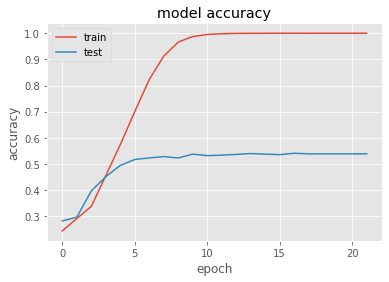

In [115]:
plot_acc()

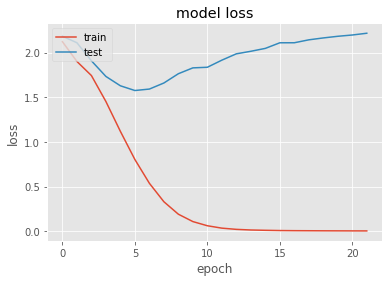

In [116]:
plot_loss()